# Project Description
In this notebook I will go over some of the basics of a fully connect feed forward neural network. I will mainly focus on their applications, how neural networks are formed, and the math. In this notebook I will be creating a neural network with only using `numpy` (a python library). This notebook will also use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) as an example. Things that will be useful to understand going into this notebook are simple python, matrix multiplication and multivariable calculus. 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# The Data
Neural networks are very powerful tools that can help us solve problems that are non linear. For example if we have some data that is linear seperable we can easily use any

In [2]:
data_folder = 'data'
X_train = pd.read_csv(f'./{data_folder}/X_train.csv')
y_train = pd.read_csv(f'./{data_folder}/y_train.csv')
X_test = pd.read_csv(f'./{data_folder}/X_test.csv')
y_test = pd.read_csv(f'./{data_folder}/y_test.csv')

Taking a look at our data we can see that there are multiple variables

In [3]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,2.4,3.7,1.0
1,4.8,3.0,1.4,0.1
2,5.5,2.6,4.4,1.2
3,5.0,3.2,1.2,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,6.3,2.7,4.9,1.8
108,7.2,3.0,5.8,1.6
109,5.8,4.0,1.2,0.2
110,5.2,3.4,1.4,0.2


To further drive the point that simple logistic regression will not work we will graph the data to see what it looks like. 

No handles with labels found to put in legend.


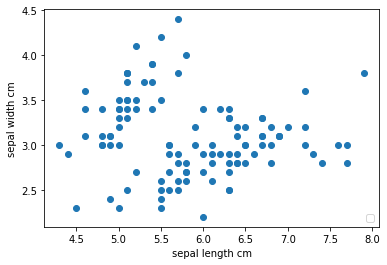

In [4]:
# TODO: graph with color
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'])
plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')
# plt.legend(loc="lower right")
plt.show()

Now that we have taken a look at our data we can get into 

# Neural Network Anatomy
A neural network is formed by an input layer, some number of hidden layers, and an ouput layer. All of these layers contain some number of neurons. The input layer has as many neurons as it does inputs. For example in our network our input layer will have four neurons for `sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)`. Simiarly our output layer has as many neurons as it does classes. For example we have the three classes `Iris-versicolor, Iris-setosa, Iris-virginica` so we will have three output neurons. As I mentioned we can have as many hidden layers as we want. Within the hidden layers we can have as many neurons as we choose as well. To demonstrate what a nerual network looks like below is an image of the neural network that is made later in this notebook.

The lines connecting the input layer to the first hidden layers are called weights same for the first hidden layer to the second hidden layers. These weights are what we will later be adjusting using back propogation.

The idea of the nueral network is that we have some inputs and we want to pass them forward to through the network (from the input to hidden layers and to the output). The

# The Math (Feeding Forward)
To feed forward an input from the input layer to the first hidden layer we will multiply all inputs $\vec{x}$ by all the weights connecting the input layer to h1 $W_1$ and add some bias $b_1$. Doing all that will give us $h_1$. We then apply some non linearity function to that and that will be our activations. In this case we are using relu. This looks like this: 
$$ \vec{z_1} = relu(\vec{h_1})$$
$$ \vec{h_1} = W_1 * \vec{x} + \vec{b_1} $$
$$ \vec{z_1} = relu(W_1 * \vec{x} + \vec{b_1})$$

Now we just continue this unitl we get to the output layer. So to keep forwarding this input we would now do this: 

$$ \vec{z_2} = relu(\vec{h_2})$$
$$ \vec{h_2} = W_2 * \vec{z_1} + \vec{b_2} $$
$$ \vec{z_2} = relu(W_2 * \vec{h_1} + \vec{b_2})$$

And lastly our ouput will simply just be:
$$ \hat{y} = softmax(\vec{z_2}) $$ 

# Back Propogation
As I mentioned there are weights and biases. We can manually adjust them or set them to random variables to see which values give us the best result. This of course is not a good proccess seeing how our network has so many weights and biases. What we want to do instead is learn the values we need to change our weights and biases to in order to minimise our loss. We can do this with calculus. We can do this by taking the negative gradient of our cost function ($ C = (\hat{y}-y)^2$). Below I will explain the math that allows us to learn the values for our weights and biases.

This is a basic example of what our network looks like. We have an input($X$), two hidden layers ($h_1,h_2$) and two weights ($W_1,W_2$). 
$$ X ---W_1---> h_1 ---W_2---> h_2$$

To calculate the error that our network produces we use the cost function $ C = (\hat{y} - y)^2 $
where $ \hat{y} $ is the output vector/activations and $ y $ is the label as a vector. An example of what these look like is $ \hat{y} = \begin{bmatrix}
0.8 \\
0.1 \\
0.1 
\end{bmatrix} $ and $ \hat{y} = \begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix} $

As I mentioned our output is $\hat{y}$ which is given by the follwing function $\hat{y} = relu{(z^\hat{y})}$. The activations $z^\hat{y}$ are passed trough the relu function. $z^\hat{y}$ is given by this

$$ z^\hat{y} = W_3 * \vec{h_2} + \vec{b_3}  $$

In the euqation above we see that the output activations is given by the weights ($W_3$) multiplied by the previous layers activations ($\vec{h_2}$) and lastly we add some bias ($\vec{b_3}$). In network example at the top our weights, biases and activations are all scalers but in all these examples I will use the vector notation $\vec{v}$

Now that we have defined all of our functions we can see how they are all conected. We can take the gradient of our cost function $C$ using the chain rule. This will help us see how much the weights $W_3$ affect the cost function 
$$ \frac{\partial C}{\partial W_3} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z^\hat{y}} \frac{\partial z^\hat{y}}{\partial W_3} = 2(\hat{y} - y) * relu{(z^\hat{y})} * \vec{h_2} $$

This will tell us by how much we should change the weights in $W_3$

Now we will continue this proccess propagating the error backwards checking how the weights affect each layer/thecost. Next we change our previous $z^\hat{y}$ function. It now looks like. $$ z^{h2} = W_2 * \vec{h_1} + \vec{b_2}  $$
 So now we will do $ \frac{\partial h_2}{\partial W_2}$. This will look like this: $$ \frac{\partial h_2}{\partial w_2} = \frac{\partial h_2}{\partial z^{h_2}} \frac{\partial z^{h_2}}{\partial W_2} \frac{\partial C}{\partial W_3} = relu{(z^{h_2})} * h_1 * \frac{\partial C}{\partial W_3} $$
 
 
This will tell us by how much we should change the weights in $\vec{w_2}$


Now we will continue this proccess propagating the error backwards checking how the weights affect each layer. First I will update our previous $z^{h2}$ function. It now looks like. $$ z^{h_1} = W_1 * \vec{X} + \vec{b_1}  $$
 So next our we will do $ \frac{\partial h_1}{\partial W_1}$. This will look like this: $$ \frac{\partial h_1}{\partial W_1} = \frac{\partial h_1}{\partial z^{h_1}} \frac{\partial z^{h_1}}{\partial W_1} \frac{\partial C}{\partial W_3} = relu{(z^{h_1})} * X * \frac{\partial h_2}{\partial W_2} *\frac{\partial C}{\partial W_3} $$
 
 
Lastly we this will tell us by how much we should change the weights in $W_1$

Now that we have talked about how a neural network feeds forward an input to get and output. And that we have went over how we can learn the values of the weights and biases of our neural network, it is time to build one. Below is the code to a neural network class which we will train to classify dataset. The network below has an input layer of four nerons for our for inputs, 2 hidden layers one of two neurons and one of 3 output neurons. I will go over how a neural network is trained below as well but as mentioned it involves the calculus that is explained above.

# Creating the Network
Below is the code for a neural network. As explained earlier our network will have a input layer, two hidden layers, and two weights. 

In [5]:
class Network:
    def __init__(self):
        # layers/activations
        self.input = np.random.rand(4, 1)
        self.h1 = np.random.rand(2, 1)
        self.h2 = np.random.rand(3, 1)
        
        # weights 
        self.w_1 = np.random.rand(2, 4)
        self.w_2 = np.random.rand(3, 2)
        
        # biases 
        self.b_1 = np.random.rand(2, 1)
        self.b_2 = np.random.rand(3, 1)

    def relu(self,activations):
        return np.maximum(0, activations)

    def relu_deriv(self, activations):
        return activations > 0

    def softmax(self, activations):
        return np.exp(activations) / np.sum(np.exp(activations))
    
    def feed_forward(self, X):
        # input
        # reshapre the input into vector form.
        # Example [1, 0, 0] -> [[1], [1], [1]]
        self.input = np.reshape(X, (-1,1))
        
        # input -> h1
        # the activations in the first hidden layer are given by the dot product 
        # of the weights by the input plus some biass its all then passed into
        # our activation function. relu(W_1*x+b_1)
        h1_activations = self.relu(np.dot(self.w_1, self.input) + self.b_1)
        self.h1 = h1_activations

        # h1 -> h2
        # the activations in the seocnd hidden layer (h_2) are given by the dot product 
        # of the second weights (w_2) by the previous activations (h1) plus the bias(b_2).
        # W_2*h1+b_2
        h2_activations = (np.dot(self.w_2, h1_activations) + self.b_2)
        self.h2 = h2_activations 

        # h2 -> output 
        # our output activtions/predictions are given by the second layer activations (h_2)
        # put into the softmax function. 
        output = self.softmax(self.h2)
        
        return (output, max(output))
    
    def back_prop(self, output, y, learning_rate=0.01):
        y = np.reshape(y, (-1,1))
        
        # Derivative of the cost function.
        # The cost function is C = (output - y)^2
        # The derivative of that is 2 (output - y)
        dc = (2 * (output - y))
        
        # Derivative of the cost function with respect to the weights (w_2).
        # The because our output is given by: output = w_2*h_1+b_2. The deriative
        # of the cost function with respect to w_2 is: dc * h1
        dc_dw2 = -learning_rate * dc.dot(self.h1.T)
        b_2 = -learning_rate * dc


        # Derivative of the cost function with respect to the first weights (w_1)
        # h1 is given by w_1*x+b_1
        h1_error = self.w_2.T.dot(dc) * self.relu_deriv(self.h1)
        dc_dw1 = -learning_rate * (h1_error.dot(self.input.T))
        b_1 = -learning_rate * h1_error
        
        # update all the weights
        self.w_1 +=  dc_dw1
        self.w_2 +=  dc_dw2
        
        # update all the biases
        self.b_1 += b_1
        self.b_2 += b_2
        return 0
       
    def get_accuracy(self, data):
        total = 0
        for index, row in data.iterrows():
            # select the label
            y = row.tolist()[4:]
            # select the x
            X = row.tolist()[:4] 
            output, predicted = self.feed_forward(X)
            label_index = y.index(max(y))
            predicted_index = np.where(output==predicted)[0][0]
            if label_index == predicted_index:
                total += 1
        return total/data.shape[0]
        

    def train(self, X, Y, itterations):        
        y_dummies = pd.get_dummies(Y)
        data = pd.concat([X, y_dummies], axis=1)
        for i in range(itterations):
            for index, row in data.iterrows():
                # select the label
                y = row.tolist()[4:]
                # select the x
                x = row.tolist()[:4] 
                # feed forward
                output, predicted = self.feed_forward(x)
                # back prop
                self.back_prop(output, y)
        training_accuracy = self.get_accuracy(data)
        return training_accuracy

# Using the Network

In [6]:
# get our test data into one dataframe 
data = pd.concat([X_test, pd.get_dummies(y_test)], axis=1)

In [7]:
nn = Network()

In [8]:
# train our network with 100 iterations
training_accuracy = nn.train(X_train, y_train, 100)

In [9]:
print(f'Training Accuracy: {training_accuracy}')

Training Accuracy: 0.9732142857142857


In [10]:
print(f'Test Accuracy: {nn.get_accuracy(data)}')

Test Accuracy: 0.9210526315789473


# Explaning Further Topics of Neural Networks 
- > dropput
- > training methods

In [12]:
def get_info(iterations, X_train, y_train, test_data):
    """
    This function will return data to graph how our neural network
    changes as we increas the iterations. 
    """
    df = pd.DataFrame(columns=['iteration', 'training_accuracy', 'tetst_accuracy'])
    for i in iterations:
        # create a new network
        network = Network()
        # train our network (also return trainin accuracy)
        training_accuracy = network.train(X_train, y_train, i)
        # returns test accuracy
        test_accuracy = network.get_accuracy(test_data)
        # add to df
        df.loc[i] = [i] + [training_accuracy] + [test_accuracy]
    return df

In [13]:
# Warning: This cell takes a long time to run
nums = [1, 5, 10, 50, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
df = get_info(nums, X_train, y_train, data)

In [14]:
df

,iteration,training_accuracy,tetst_accuracy
1,1.0,0.321429,0.368421
5,5.0,0.732143,0.631579
10,10.0,0.812500,0.789474
50,50.0,0.946429,0.921053
100,100.0,0.973214,0.921053
500,500.0,0.973214,0.947368
1000,1000.0,0.973214,0.947368
1500,1500.0,0.973214,0.947368
2000,2000.0,0.964286,1.000000
2500,2500.0,0.964286,0.947368


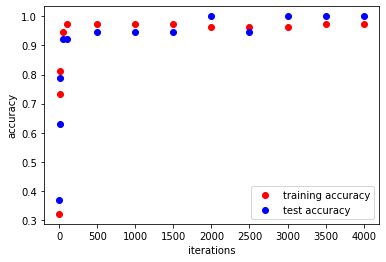

In [15]:
plt.scatter(df['iteration'], df['training_accuracy'], color='r', label='training accuracy')
plt.scatter(df['iteration'], df['tetst_accuracy'], color='b', label='test accuracy')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.show()

# Conclusion